# PROSPER: Exploring a Loan Company's Data to Evaluate Performance and Uncover Business Opportunities
## By: Ayobami Yusuf

## Overview

> Prosper Marketplace was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than 21 billion USD in loans to over 1.3 million people. Borrowers apply online for a fixed-rate, fixed-term loan between 2000 USD and 40000 USD. <p>
> <b>How has Prosper performed over the years? And are there any trends and relationships in its data that may be useful in understanding specific characteristics of Prosper's loan listings?</b>


## Dataset Overview

> The dataset analyzed is obtained from Prosper. The original dataset contains 81 variables, but focus will be on just a subset of that data, analyzing only variables such as 'LoanStatus', 'BorrowerAPR', 'BorrowerState', 'EstimatedLoss', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus', etc.
               

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

#make a copy of the data
loan_data_copy = loan_data.copy()

#next, subset the data to isolate only the needed variables
#defining a list of needed variables
vars_needed = ['LoanStatus', 'BorrowerAPR', 'BorrowerState', 'EstimatedLoss', 
               'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'Occupation', 
               'EmploymentStatus', 'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'LoanOriginalAmount', 
               'MonthlyLoanPayment', 'LoanOriginationDate', 'LoanOriginationQuarter']
            
#subseting the dataset for only variables of interest
loan_df = loan_data_copy[vars_needed]

#comverting LoanOriginationDate to datetime type so I could extract the year
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

#engineering the Year feature
loan_df['LoanYear'] = pd.DatetimeIndex(loan_df['LoanOriginationDate']).year

## Year-on-Year Trend of Prosper Loan Listings

> There's a general upward trend in the amount of loans listed year-on-year. However, it is interesting to see that **2013** saw a rapid rise in the number of Loan Listings posted by Prosper. Further **[research](https://news.fintechnexus.com/april-2013-lending-club-prosper)** revealed that this surge was more prominent during early **Q2 (April**, specifically**)**

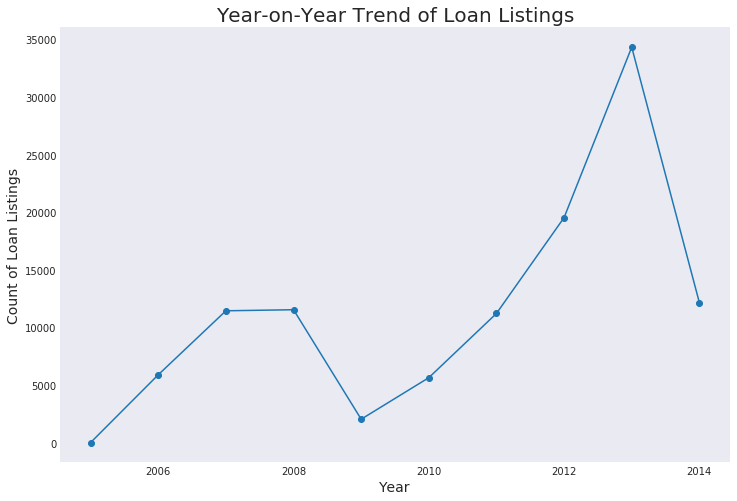

In [24]:
#preliminary plot figure settings
plt.figure(figsize=[12,8])
sns.set_style('dark', {'xtick.bottom': True})
base_color=sns.color_palette()[0]

#plotting the year-on-year trend of loan listings
loan_df['LoanYear'].value_counts().sort_index().plot(kind='line', marker = 'o')
plt.xlabel('Year', size = 14)
plt.ylabel('Count of Loan Listings', size = 14)
plt.title('Year-on-Year Trend of Loan Listings', size=20);

## Relative Frequency of Each Loan Status for all Loan Prosper Listed

> Overall, we see a **low default rate** amongst Prosper borrowers, as only about **17%** of total borrowers either defaulted, have their loans charged off or have their loans due within 4 months. However, due to the fact that almost 50% of loan listings were still ongoing as at the time the data was provided, it is hard to accurately assess the completion rate compared to the other loan statuses, but, generally, the completion rate observed from the data is quite impressive.

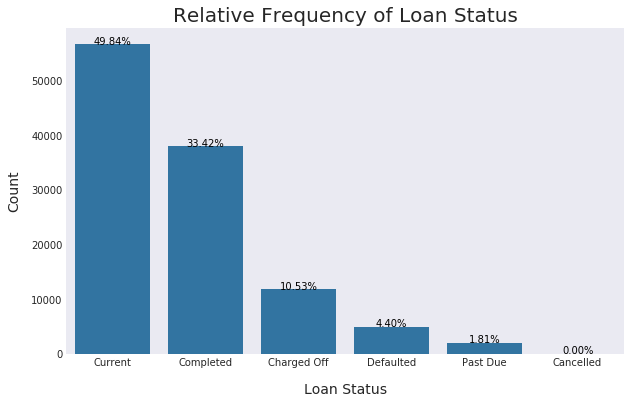

In [25]:
#create dictionary to pair redundant statuses with more standard ones
status_dict = {"Current":"Current", "Completed":"Completed", "Chargedoff":"Charged Off", "Defaulted":"Defaulted",
              "Past Due (1-15 days)":"Past Due", "Past Due (31-60 days)":"Past Due",
             "Past Due (61-90 days)":"Past Due", "Past Due (91-120 days)":"Past Due", "Past Due (16-30 days)":"Past Due",
             "FinalPaymentInProgress":"Current", "Past Due (>120 days)":"Past Due", "Cancelled":"Cancelled"}

#replace the status names
loan_df['LoanStatus'].replace(status_dict, inplace=True)

#plot the distribution
ls_cnt=loan_df['LoanStatus'].value_counts()
ls_pct=loan_df['LoanStatus'].value_counts()/loan_df.shape[0]*100

plt.figure(figsize=[10, 6])
ax = sns.countplot(x='LoanStatus', data=loan_df, order=loan_df.LoanStatus.value_counts().index, color=base_color)

locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    cnt = ls_cnt[label.get_text()]
    pct = ls_pct[label.get_text()]
    if pct>5:
        plt.text(loc, cnt-190, '{:0.2f}%'.format(pct), ha = 'center', color = 'k')
    else:
        plt.text(loc, cnt+50, '{:0.2f}%'.format(pct), ha = 'center', color = 'k')
        
plt.xlabel('Loan Status', labelpad=15, fontsize=14)
plt.ylabel('Count', labelpad=10, fontsize=14)
plt.title('Relative Frequency of Loan Status', fontsize=20);

## The Relationship between Monthly Income of Borrowers and Amount of Loan Listed
> Here, we can see the distribution is concentrated around monthly income below 20,000 USD and listing amount below 35,000 USD. We see no interesting trend here. However, we do see that Prosper lists smaller loan amounts irrespective of borrowers' stated monthly income. This could be Prosper tyring to play safe (risk averse), especially since Prosper's documentation caps Prosper's listing at $40,000. The concentration in the lower income brackets could be due to factors that the data may not be able to explain. Exammining the impact of Risk ratings on Listing amount may however, shed more light.

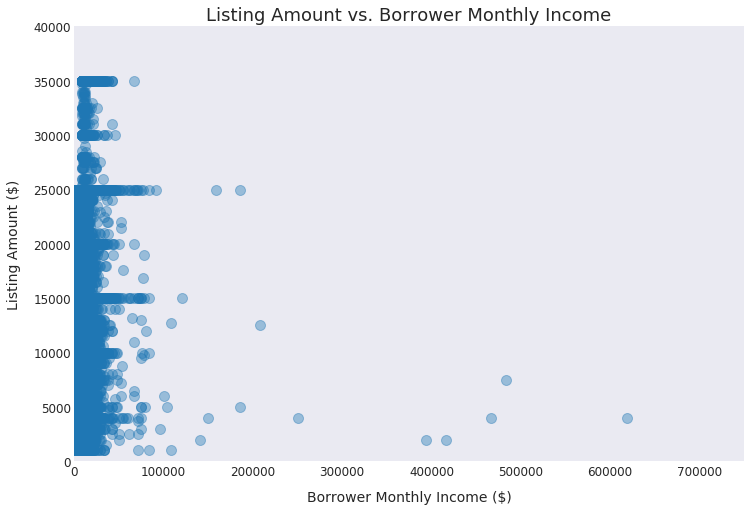

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(loan_df.StatedMonthlyIncome, loan_df.LoanOriginalAmount, 
            alpha=0.4, color=base_color, s=100);

#i set the xlim and ylim parameters having observed just a few outlier beyond income level of 500000
plt.xlim(0,750000)
plt.ylim(0,40000)

plt.xlabel('Borrower Monthly Income ($)', labelpad=12, fontsize=14)
plt.ylabel('Listing Amount ($)', labelpad=12, fontsize=14)
plt.title('Listing Amount vs. Borrower Monthly Income', fontsize=18);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

## Relationship between Prosper Risk Rating and Listed Loan Amount
> The resulting chart shows that the median listing amount in each credit rating is below $8000 which makes sense and quite agrees with what we saw earlier about Prosper mostly issuing loans of little amount. The listing amount though is observed to increase with credit rating quality. Thus, it is safe to conclude that, Prosper has indeed been playing safe, and also that confidence in the customer's credit-worthiness (assessed by thier risk rating) imapcts the amount listed per customer. 

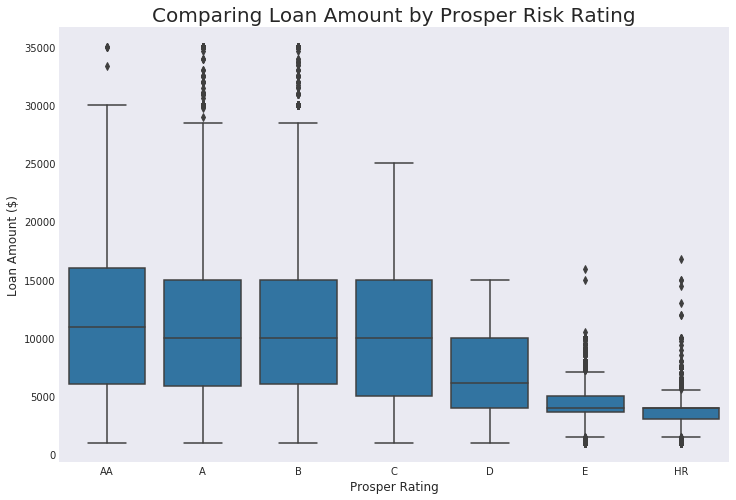

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='ProsperRating (Alpha)', y='LoanOriginalAmount',
                 data=loan_df, color=base_color, order=['AA','A','B','C','D','E','HR'], orient='v');

plt.xlabel('Prosper Rating', size=12)
plt.ylabel('Loan Amount ($)', size=12)
plt.title('Comparing Loan Amount by Prosper Risk Rating', size=20);

## How do different Risk ratings compare when Assessing the Relationship between Borrower APR and Estimated Loss for Borrowers?
> There is a clear pattern here. Low Risk borrowers cluster around low borrower APR and low estimated loss regions, while High Risk borrowers tend to cluster around the high borrower APR and high estimated loss regions. <p> In general, a positive relationship is observed between Borrower APR and Estimated Loss and the higher the risk factor for a borrower, the higher the trade-off between APR and Estimated Loss for such borrower.

<Figure size 864x576 with 0 Axes>

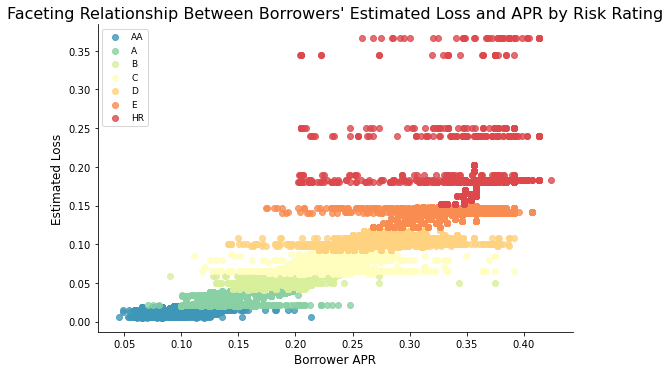

In [4]:
plt.figure(figsize=[12,8]);

g = sns.FacetGrid(data = loan_df, hue = 'ProsperRating (Alpha)', hue_order = ['AA','A','B','C','D','E','HR'], 
                  size = 5, aspect = 1.5, palette="Spectral_r");
g.map(sns.regplot,'BorrowerAPR', 'EstimatedLoss', fit_reg = False);
plt.xlabel("Borrower APR", size=12);
plt.ylabel("Estimated Loss", size=12);
plt.title("Faceting Relationship Between Borrowers' Estimated Loss and APR by Risk Rating", size=16);
plt.legend(loc=2, fontsize = 9);

## How do the Loan Status and the Risk Rating of Borrowers Relate - with respect to Average Estimated Loss?
> We confirm that Borrower's with Rating AA and whose Loan Status reads Completed show the Lowest Average Estimated Loss and we see the Highest Average Estimated Loss recorded for High Risk (HR) borrowers whose Loan Status reads Completed, and even those whose Loan status reads Charged off or Defaulted. The major determinant of Estimated Loss proved to be the Credit Score of a Borrower. <p> This results agree with Business Domain Knowledge where it is expected that the Higher the Risk Score of a Borrower, the Higher the Business Loss expected.

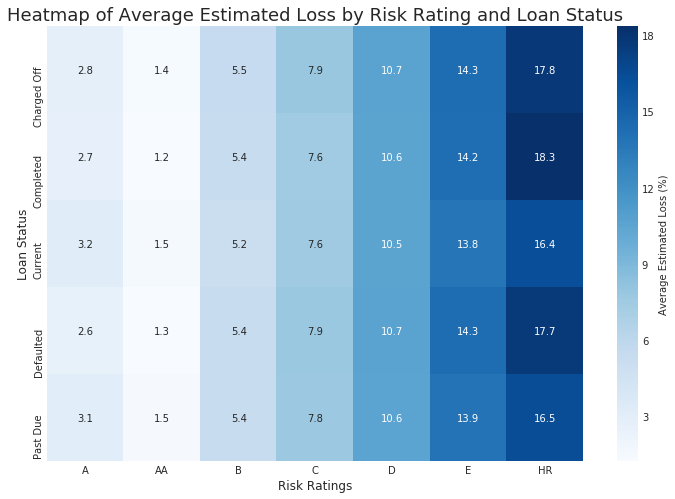

In [29]:
plt.figure(figsize = [12,8])

#grouping the dataframe by Prosper Rating and Loan Status and retrieving their mean estimated loss values 
cat_mean = loan_df.groupby(['ProsperRating (Alpha)', 'LoanStatus']).mean()['EstimatedLoss']*100
cat_mean = cat_mean.reset_index(name = 'Average Estimated Loss')
cat_mean = cat_mean.pivot(index = 'LoanStatus', columns = 'ProsperRating (Alpha)', values = 'Average Estimated Loss')

#plotting
sns.heatmap(cat_mean, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Average Estimated Loss (%)'})
plt.xlabel('Risk Ratings', size=12)
plt.ylabel('Loan Status', size=12)
plt.title('Heatmap of Average Estimated Loss by Risk Rating and Loan Status', size=18);

## Thank You!